In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print("Hello World!")


Hello World!


In [2]:
x = np.array([1, 2])
y = np.array([-2, 1])
a = np.dot(x, y)
print(a)


0


In [3]:
b = np.linalg.norm(x)
c = np.sqrt(x[0]**2 + x[1]**2)
print(b, c)


2.23606797749979 2.23606797749979


In [4]:
theta = np.arccos(np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(x)))
B = np.array([[3,2,1], [2,6,5], [1,5,9]], dtype=float)
print(B)
print(B - B.T)


[[3. 2. 1.]
 [2. 6. 5.]
 [1. 5. 9.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [5]:
z = np.random.rand(3)
v = B @ z
print(v.shape)
print(z.T @ B @ z)
print(z.T @ B @ z)

(3,)
12.726669621968766
12.726669621968766


### 3 Random Numbers and Uni-variate Densities

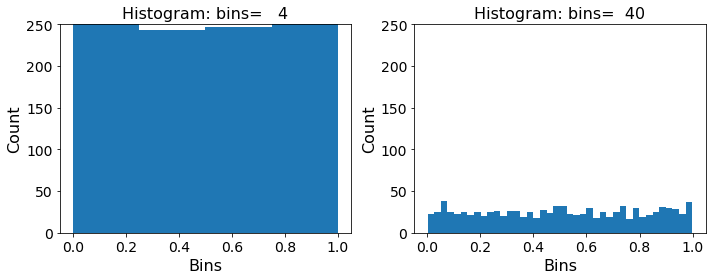

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#x = np.random.rand(1000,1)
x = np.random.rand(1000,1)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
n1bins, n2bins = 4, 40
ax[0].hist(x, bins=n1bins)
ax[0].set_ylim(0,250)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].tick_params(axis="both", which="major", labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)

ax[1].hist(x, bins=n2bins)
ax[1].set_ylim(0,250)
ax[1].set_xlabel("Bins", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis="both", which="major", labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)

#plt.savefig("histograms_uniform.png")
plt.tight_layout()


(array([  1.,   0.,   0.,   4.,  11.,  23.,  24.,  60.,  71., 107., 137.,
        143., 117.,  97.,  93.,  53.,  24.,  21.,   6.,   8.]),
 array([-5.08380871, -4.63128879, -4.17876887, -3.72624895, -3.27372903,
        -2.82120911, -2.3686892 , -1.91616928, -1.46364936, -1.01112944,
        -0.55860952, -0.1060896 ,  0.34643032,  0.79895024,  1.25147015,
         1.70399007,  2.15650999,  2.60902991,  3.06154983,  3.51406975,
         3.96658967]),
 <BarContainer object of 20 artists>)

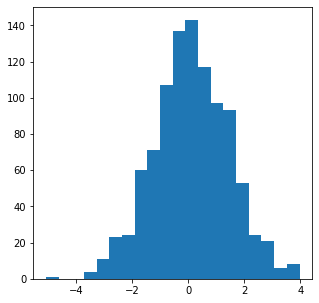

In [7]:
N = 1000
x1 = np.zeros(N)
for n in range(N):
    x1[n] = np.sum(np.random.rand(12,1)) - np.sum(np.random.rand(12,1))
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 20)

### 4 Uncertainty in Estimation

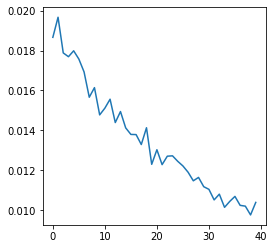

In [12]:
MaxTrial = 2000
sampleSizeRange = np.linspace(100, 200, 40)
plotVar = np.zeros(len(sampleSizeRange))

for sSize in range(len(sampleSizeRange)):
    numSamples = int(sampleSizeRange[sSize])
    vStrial = np.zeros(MaxTrial)
    
    for trial in range(MaxTrial):
        xx = np.random.randn(numSamples,1)
        vStrial[trial] = np.var(xx)
        plotVar[sSize] = np.var(vStrial)
        
fig, ax = plt.subplots(figsize=(4,4))
ax.plot((plotVar))


### 5 Bi-variate Gaussian Distribution

In [13]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing="ij")
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z


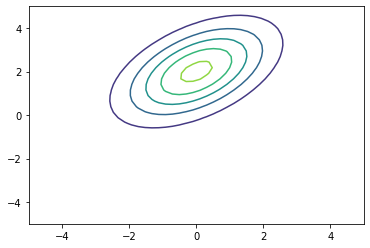

In [14]:
# Plot contours
#
nx, ny = 50, 40
m1 = np.array([0,2])
C1 = np.array([[2,1], [1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

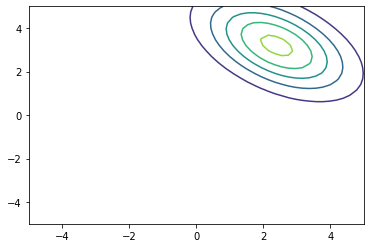

In [23]:
m1 = np.array([2.4,3.2])
C1 = np.array([[2,-1], [-1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

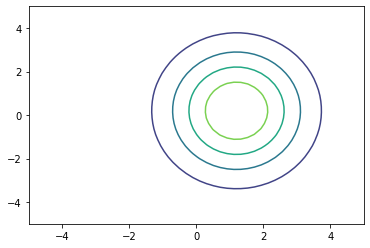

In [24]:
m1 = np.array([1.2,0.2])
C1 = np.array([[2,0], [0,4]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

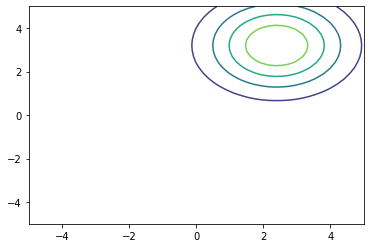

In [25]:
m1 = np.array([2.4,3.2])
C1 = np.array([[2,0], [0,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

### 6 Sampling from a multi-variate Gaussian

In [16]:
C = np.array([[2.0,1.0], [1.0,2]])
A = np.linalg.cholesky(C) # A=lower traingular matrix
print(A @ A.T) # C=A*A_transpose

[[2. 1.]
 [1. 2.]]


In [25]:
X = np.random.randn(5000,2) #bivariate Gaussian random data
Y = X @ A #transform each of the data (rows of X)
print(X.shape)
print(Y.shape)

(5000, 2)
(5000, 2)


(-6.0, 6.0)

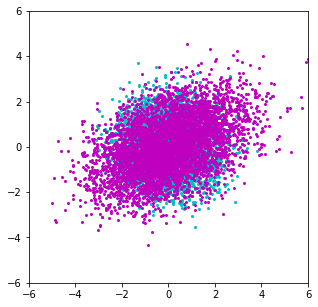

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], c="c", s=4)
ax.scatter(Y[:,0], Y[:,1], c="m", s=4)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

### 7 Distribution of Projections

In [27]:
theta = np.pi/3
u = [np.sin(theta), np.cos(theta)]
print("The vector: ", u)
print("Magnitude : ", np.sqrt(u[0]**2 + u[1]**2))
print("Angle : ", theta*180/np.pi)

The vector:  [0.8660254037844386, 0.5000000000000001]
Magnitude :  1.0
Angle :  59.99999999999999


In [29]:
yp = Y @ u
print(yp.shape)
print("Projected variance: ", np.var(yp))

(5000,)
Projected variance:  3.0253200623613785


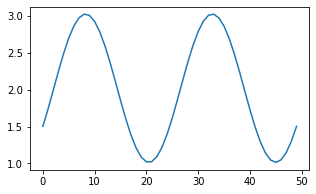

In [31]:
# Store projected variances in pVars & plot
#
nPoints = 50
pVars = np.zeros(nPoints)
thRange = np.linspace(0, 2*np.pi, nPoints)

for n in range(nPoints):
    
    theta = thRange[n] # angle
    u = [np.sin(theta), np.cos(theta)] 
    
    #variance of projected data alone the projected direction
    pVars[n] = np.var(Y @ u) 
    
    
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pVars)


### 8 Perceptron


In [36]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[2, 1], [1, 2]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2


In [37]:
X = np.concatenate((X1, X2), axis=0)

In [38]:
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))


In [39]:
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;


(200, 2) (200,) (200, 2) (200,)


In [40]:
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N


In [62]:
# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(2)
print(w)
# What is the performance with the initial random weights?
#
print("Initial Percentage Correct: " "%6.2f" %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
    # Select a data item at random
    #
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
    # If it is misclassified, update weights
    #
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
    # Evaluate trainign and test performances for plotting
    #
    P_train[iter] = PercentCorrect(X_train, y_train, w);
    P_test[iter] = PercentCorrect(X_test, y_test, w);
print("Percentage Correct After Training: %6.2f %6.2f"
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

[ 0.59700379 -0.69492393]
Initial Percentage Correct:   0.00
Percentage Correct After Training: 100.00  99.00


Text(0.5, 0, 'Iteration')

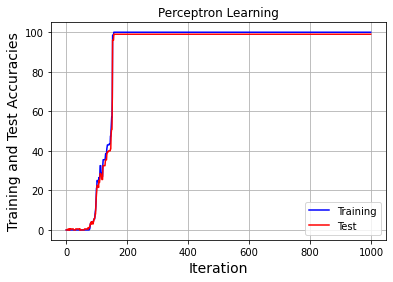

In [63]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, "b", label = "Training")
ax.plot(range(MaxIter), P_test, "r", label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test Accuracies", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
#plt.savefig('learningCurves.png’)


In [64]:
# Scikitlearn can do it for us
#
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))

yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))

if (accuracy_score(yh_test, y_test) > 0.99):
    print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


In [65]:
O = np.ones((2*NumDataPerClass, 1))
X = np.append(X, O, axis=1)
w = np.random.randn(3)